# Parte 1

Escribe una función que tenga como input un vector 'x' con valores distribuidos uniformemente, y unos parámetros:
- a; 
- b; 
- m;  
- n

y que devuelva como output una matriz cuya primera columna sea: 

$y = a + b \cdot x$ 

más un término estocástico sacado de una gaussiana con: 

$\sigma = m + n \cdot x^2$ 

y la segunda columna el error: 

$\sigma = m + n \cdot x^2$ 

In [1]:
get.y <- function(x, intercept, angular.coeff, std.dev.a, std.dev.b){
    y <- c()
    sigma <- c()
    for (value in x){
        my.sigma  <- std.dev.a + std.dev.b * value^2
        sigma <- c(sigma, my.sigma) 
        y <- c(y, rnorm(1, (angular.coeff*value + intercept), my.sigma))
    }
    my.out.table <- cbind(y, sigma)
    return(as.data.frame(my.out.table))
}

# Parte 2

Escribe otra función que haga lo mismo que la anterior pero con un parámetro más 'c' de tal forma que haga lo mismo pero con un modelo:

$y = a + b \cdot x + c \cdot x^2$

In [2]:
# Esto deberia ser valido para cualquier polinomio.
# parameters es un vector de parametros (e.g. parameters = c(a,b,c))

get.pol.n <- function(x, parameters, std.dev.a, std.dev.b){
    y <- c()
    sigma <- c()
    for (value in x){
        my.sigma  <- std.dev.a + std.dev.b * value^2
        sigma <- c(sigma, my.sigma) 
        model <- 0 
        for (i in 1:length(parameters)){
            model <- model + parameters[i] * value^(i - 1)
            }
            y <- c(y, rnorm(1, model, my.sigma))        
    }
    my.out.table <- cbind(y, sigma)
    return(as.data.frame(my.out.table))
}

# Parte 3

Usando como valores: 
- a = 1; 
- b = 2;
- c = 0.01;
- m = 0.1;
- n = 0.04 

para el modelo de la primera función: calcula los parámetros para las que el likelihood es máximo asumiendo un modelo con dos parámetros:

$y = a + b \cdot x$ 

Calcula el valor del $\chi^2$ y calcula el nivel de confianza con el que rechazaríamos este ajuste.  

In [3]:
# Defino la likelihood

my.ML <- function(vec.x, mat.y, grade){
    cov.y <- diag(mat.y$sigma)
    ones <- rep(c(1), length(vec.x))
    mat.x <- cbind(ones, vec.x)
    if (grade > 1){
        for (i in 2:grade){
            mat.x <- cbind(mat.x, vec.x^i)
        }
    }
    x.T <- t(mat.x)
    xT.cov.x <- solve(x.T %*% solve(cov.y) %*% mat.x)
    xT.cov.y <- x.T %*% solve(cov.y) %*% mat.y$y
    my.params <- xT.cov.x %*% xT.cov.y
    return(my.params)
}

In [14]:
# Defino los parametros

a <- 1
b <- 2
c <- 0.01
m <- 0.1
n <- 0.04

In [5]:
# Genero los x aleatorios

N <- 100

my.x <- runif(N,0,10)

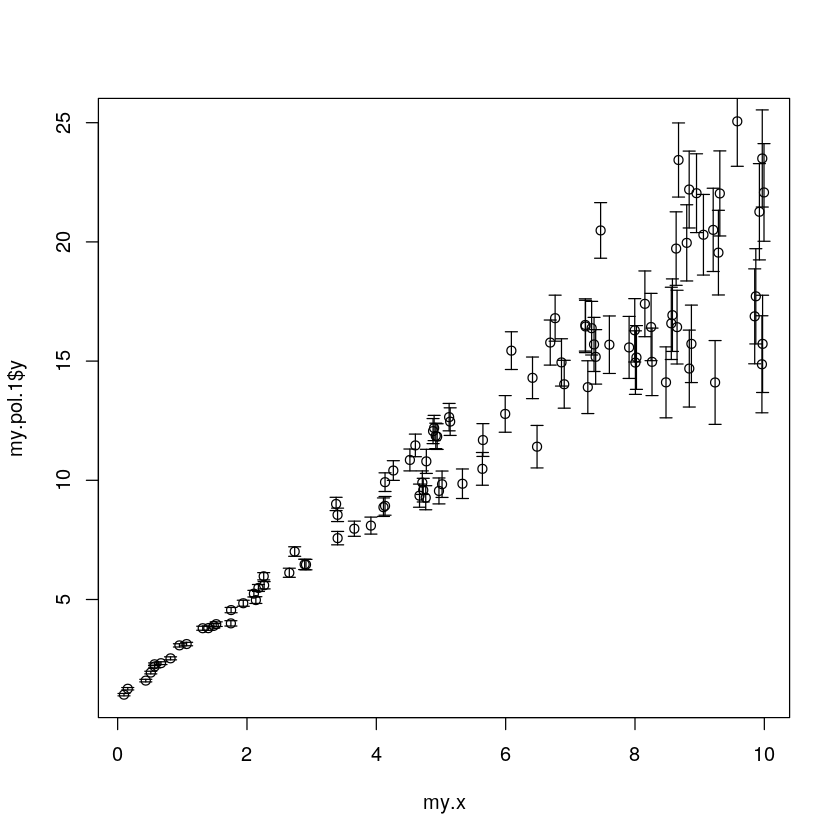

In [6]:
# Genero las 'y' siguiendo el modelo lineal

par.2 <- c(a,b)

my.pol.1 <- get.pol.n(my.x,par.2,m,n)
plot(my.x,my.pol.1$y)
arrows(my.x, my.pol.1$y - my.pol.1$sigma / 2, my.x, my.pol.1$y + my.pol.1$sigma / 2, length = 0.05, angle = 90, code = 3)

ones,"1,002596"
vec.x,"1,986395"


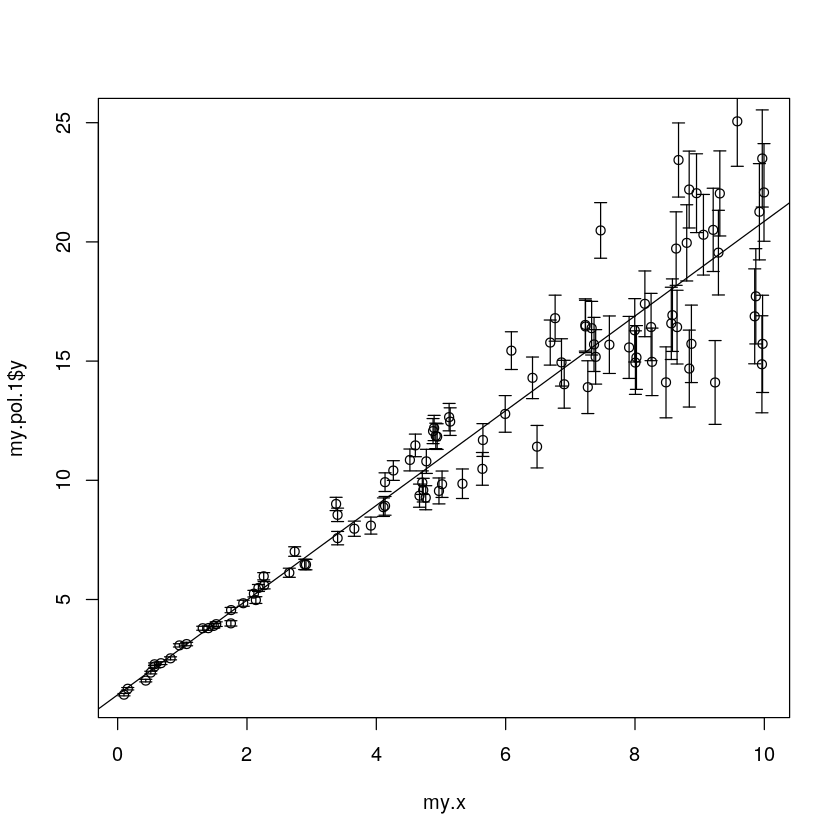

In [7]:
# ajusto al modelo lineal 
theta <- my.ML(my.x, my.pol.1, 1)
theta

plot(my.x,my.pol.1$y)
arrows(my.x, my.pol.1$y - my.pol.1$sigma / 2, my.x, my.pol.1$y + my.pol.1$sigma / 2, length = 0.05, angle = 90, code = 3)
abline(theta)

In [8]:
# Defino una función que me calcule el Chi2

my.chi <- function(vec.x, mat.y, vec.parameters){
    cov.y <- diag(mat.y$sigma)
    ones <- rep(c(1), length(vec.x))
    mat.x <- cbind(ones, vec.x)
    if (length(vec.parameters) > 2){
        for(i in 2:(length(vec.parameters)-1)){    
            mat.x <- cbind(mat.x, vec.x^i) 
        }
    }
    x.T <- t(mat.x)
    chi <- ((mat.y$y - mat.x %*% vec.parameters) / mat.y$sigma)^2
    return(sum(chi))
}

In [9]:
# Ahora calculo el Chi2

chi.2.pol1 <- my.chi(my.x, my.pol.1, theta)
chi.2.pol1

my.prob.pol1 <- pchisq(my.chi(my.x, my.pol.1, theta), 98)
my.prob.pol1

print(paste("Obtengo un Chi2 de",chi.2.pol1,"con 98 grados de libertad."))
print(paste("Puedo rechazar este ajuste con una confianza del", my.prob.pol1*100,"%"))

[1] 93,86964

[1] 0,4007275

[1] "Obtengo un Chi2 de 93,869636519393 con 98 grados de libertad."
[1] "Puedo rechazar este ajuste con una confianza del 40,0727534136243 %"


# Parte 4

Repite el paso anterior con el mismo modelo pero usando la segunda función.

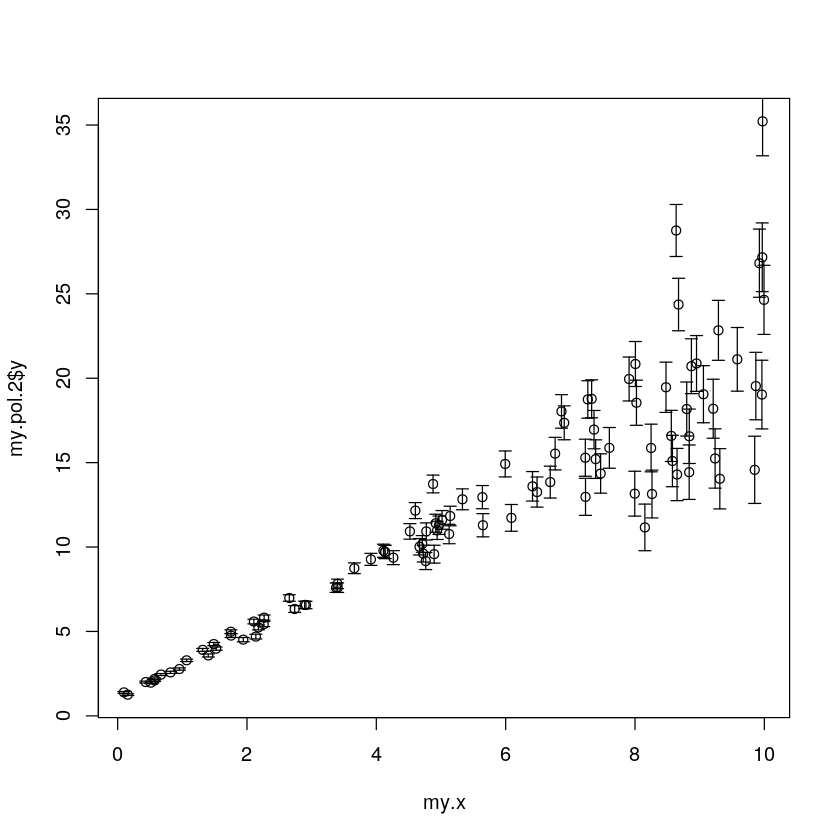

In [15]:
# Ahora genero las 'y' siguiendo el modelo cuadratico

par.3 <- c(a,b,c)

my.pol.2 <- get.pol.n(my.x,par.3,m,n)
plot(my.x,my.pol.2$y)
arrows(my.x, my.pol.2$y - my.pol.2$sigma / 2, my.x, my.pol.2$y + my.pol.2$sigma / 2, length = 0.05, angle = 90, code = 3)

ones,"0,9865364"
vec.x,"2,0501436"


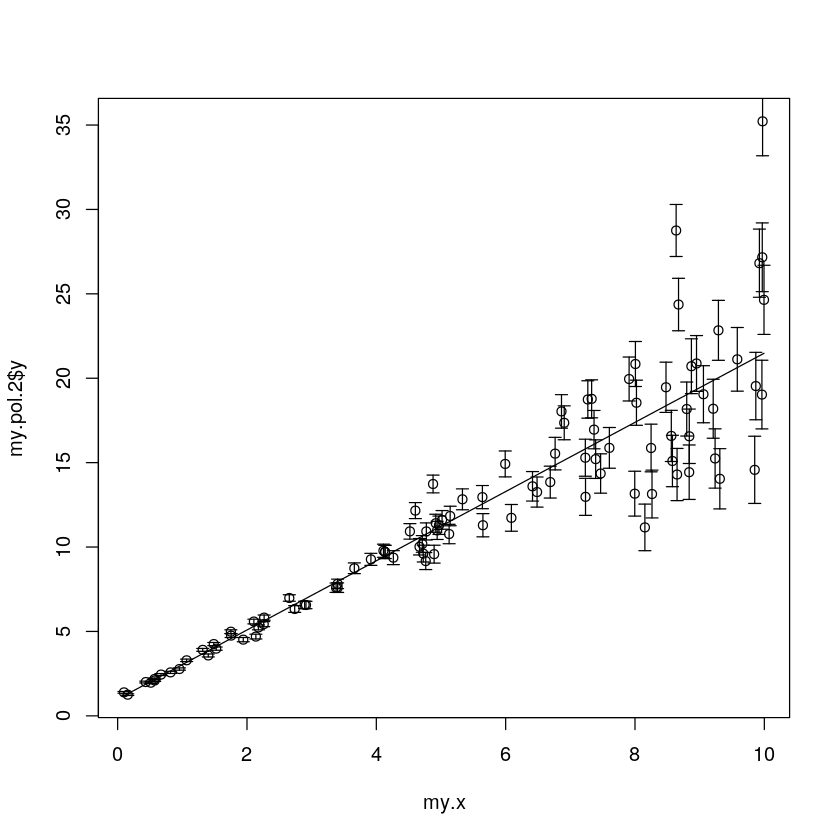

In [68]:
# ajusto los datos 'cuadraticos' al modelo lineal

theta.2 <- my.ML(my.x, my.pol.2, 1)
theta.2

plot(my.x,my.pol.2$y)
arrows(my.x, my.pol.2$y - my.pol.2$sigma / 2, my.x, my.pol.2$y + my.pol.2$sigma / 2, 
       length = 0.05, angle = 90, code = 3)
curve(theta.2[1] + theta.2[2]*x, add = T)

In [70]:
# Ahora calculo el Chi2

chi.2.pol2 <- my.chi(my.x, my.pol.2, theta.2)
chi.2.pol2

my.prob.pol2 <- pchisq(my.chi(my.x, my.pol.2, theta.2), 98)
my.prob.pol2

print(paste("Obtengo un Chi2 de",chi.2.pol2,"con 98 grados de libertad."))
print(paste("Puedo rechazar este ajuste con una confianza del", my.prob.pol2*100,"%"))

[1] 128,3861

[1] 0,9786233

[1] "Obtengo un Chi2 de 128,386122396066 con 98 grados de libertad."
[1] "Puedo rechazar este ajuste con una confianza del 97,8623328894976 %"


# Parte 5

Usando la primera de las funciones anteriores con los valores dados en 3) calcula el valor del likelihood ratio 'q' para un modelo con 2 y 3 parámetros. 

¿Con qué confidence level podemos aceptar H$_0$? 

Comenta el resultado: ¿qué modelo es mejor el primero o el segundo?.

In [58]:
# función que calcula la log-likelihood (~q)
log.L <- function(vec.x, mat.y, vec.parameters){
    sigma <- mat.y$sigma
    ones <- rep(c(1), length(vec.x))
    mat.x <- cbind(ones, vec.x)
    if (length(vec.parameters) > 2){
        for(i in 2:(length(vec.parameters)-1)){    
            mat.x <- cbind(mat.x, vec.x^i) 
        }
    }
    exponent <- ((mat.y$y - mat.x %*% vec.parameters) / mat.y$sigma)**2
    likelihood <- -log(sqrt(2*pi))*log(mat.y$sigma)
    return(sum(likelihood) + sum(exponent))
}

In [77]:
# Ahora uso los mismos datos (generados con el modelo lineal, 'my.pol.1') a:
# - modelo lineal (ya lo he hecho, los parametros son 'theta')
# - modelo cuadratico (lo hago ahora)

theta <- my.ML(my.x, my.pol.1, 1)
theta

theta.3 <- my.ML(my.x, my.pol.1, 2)
theta.3

chi.2.pol1.lin <- my.chi(my.x, my.pol.1, theta)
chi.2.pol1.lin

chi.2.pol1.cuad <- my.chi(my.x, my.pol.1, theta.3)
chi.2.pol1.cuad

q <- 2*log(chi.2.pol1.lin/chi.2.pol1.cuad)
q

my.prob.H0 <- pchisq(q, 1)

print(paste("Obtengo un maximum likelihood ratio de", q,"con 1 grado de libertad"))
print(paste("Puedo aceptar la hipotesis 0 (el ajuste correcto es con 2 parametros) con una confianza del",(1 - my.prob.H0)*100,"%"))

ones,"1,002596"
vec.x,"1,986395"


ones,"0,85608159"
vec.x,"2,13918990"
,"-0,01912592"


[1] 93,86964

[1] 89,28171

[1] 0,1002207

[1] "Obtengo un maximum likelihood ratio de 0,100220716111097 con 1 grado de libertad"
[1] "Puedo aceptar la hipotesis 0 (el ajuste correcto es con 2 parametros) con una confianza del 75,1564926710346 %"
